In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.interpolate import interp1d

In [8]:
#INPUTS
file_path = 'ferro.csv'  # Certifique-se de que o caminho do arquivo esteja correto
csvDelimiter = ','
coluna = 'Fe'
outputNamePrefix = "ferro" + "_" # Nome das figuras de output = outputPrefix + tipoGrafico
xTituloEixo = coluna

# Histograma
yTituloEixoHist= "Frequência Acumulada (%)"
tituloGraficoHist = 'Histograma'

# Histograma Acumulado
yTituloEixoHistAcum = "Frequência Acumulada (%)"
tituloGraficoHistAcum = 'Histograma Acumulado'

# Probability Plot
yTituloEixoHistPlt = "Probabilidade (%)"
tituloGraficoHistPlt = 'Probability Plot'

In [9]:
# Ler o arquivo CSV
df = pd.read_csv(file_path, delimiter=',')
dados = df[coluna].dropna()

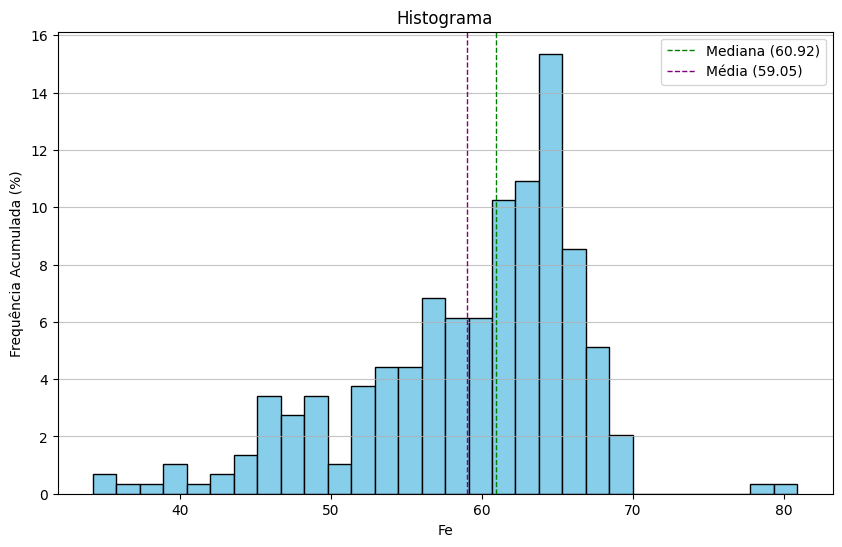

In [10]:
# CÁLCULOS DO HISTOGRAMA DE BARRAS
tipoGraficoHist = "HistBars"
contagem, bins = np.histogram(dados, bins=30)
hist_acumulado = np.cumsum(contagem)
hist_acumulado_percent = hist_acumulado / hist_acumulado[-1] * 100

# Calcular a média e mediana
media = np.mean(dados)
mediana = np.median(dados)

# Criar função de interpolação para os dados do histograma
interpolation_function = interp1d(bins[:-1], hist_acumulado_percent, kind='linear', bounds_error=False, fill_value='extrapolate')

# Calcular as frequências percentuais a partir do histograma acumulado
frequencias_percentuais = np.diff(hist_acumulado_percent, prepend=0)

# Plotar o histograma de barras em frequência percentual
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], frequencias_percentuais, width=np.diff(bins), align='edge', color='skyblue', edgecolor='black')

# Adicionar labels e título
plt.xlabel(xTituloEixo)
plt.ylabel(yTituloEixoHist) 
plt.title(tituloGraficoHist)
plt.grid(axis='y', alpha=0.75)

# Adicionando linhas de referência (opcional)
plt.axvline(x=mediana, color='g', linestyle='--', linewidth=1, label=f'Mediana ({mediana:.2f})')
plt.axvline(x=media, color='purple', linestyle='--', linewidth=1, label=f'Média ({media:.2f})')

# Adicionando a legenda
plt.legend()

# Mostrar o gráfico
plt.savefig(outputNamePrefix + tipoGraficoHist)  # Salva como PNG
plt.show()

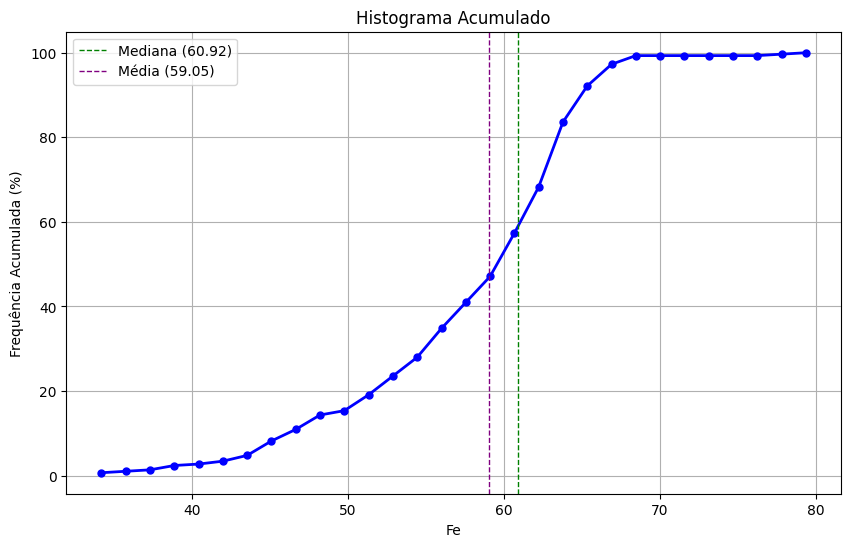

In [11]:
# CÁLCULOS DO HISTOGRAMA ACUMULADO
tipoGraficoHistAcum = "HistAcum"

contagem, bins = np.histogram(dados, bins=30)
hist_acumulado = np.cumsum(contagem)
hist_acumulado_percent = hist_acumulado / hist_acumulado[-1] * 100

# Calcular a média e mediana
media = np.mean(dados)
mediana = np.median(dados)

# Criar função de interpolação para os dados do histograma
interpolation_function = interp1d(bins[:-1], hist_acumulado_percent, kind='linear', bounds_error=False, fill_value='extrapolate')

# Plotar o histograma acumulado
plt.figure(figsize=(10, 6))
plt.plot(bins[:-1], hist_acumulado_percent, color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)

# Adicionando labels e título
plt.xlabel(xTituloEixo)
plt.ylabel(yTituloEixoHistAcum)
plt.title(tituloGraficoHistAcum)
plt.grid(True)

# Adicionando linhas de referência
plt.axvline(x=mediana, color='g', linestyle='--', linewidth=1, label=f'Mediana ({mediana:.2f})')
plt.axvline(x=media, color='purple', linestyle='--', linewidth=1, label=f'Média ({media:.2f})')

# Adicionando a legenda
plt.legend()

# Mostrar o gráfico
plt.savefig(outputNamePrefix + tipoGraficoHistAcum)  # Salva como PNG
plt.show()  

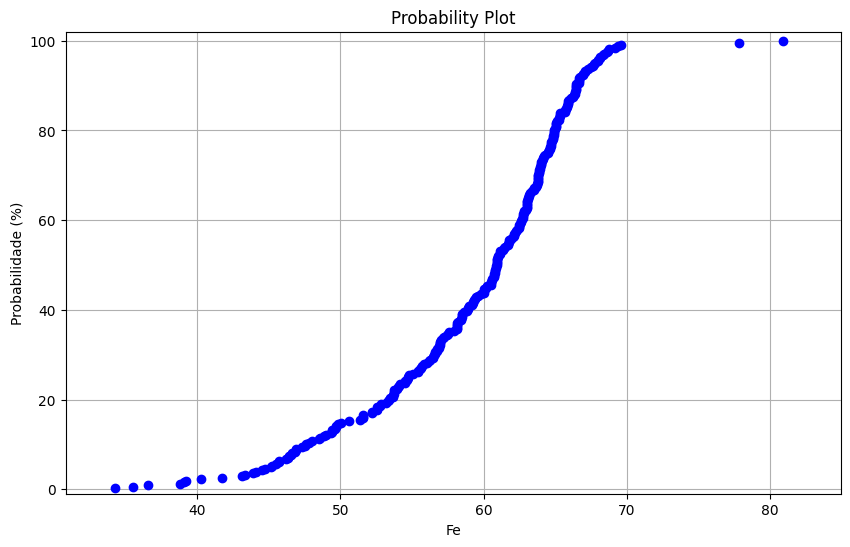

In [12]:
# CÁLCULOS DO PROBABILITY PLOT
tipoGraficoProbPlt = "ProbPlt"

# Calcula os histogramas
dados_ordenados = np.sort(dados)
probabilidades = (np.arange(len(dados_ordenados)) + 0.5) / len(dados_ordenados)

# Plota o gráfico de probabilidade
plt.figure(figsize=(10, 6))
plt.plot(dados_ordenados, probabilidades * 100, marker='o', linestyle='none', color='blue')  # Multiplica por 100 para ter a escala em %

# Adicionando labels e título
plt.xlabel(xTituloEixo)
plt.ylabel(yTituloEixoHistPlt)
plt.title(tituloGraficoHistPlt)
plt.grid(True)

# Definir limites do eixo y de 0 a 100
xMin = np.min(dados_ordenados) - np.min(dados_ordenados) * 0.1
xMax = np.max(dados_ordenados) + np.max(dados_ordenados) * 0.05
plt.xlim(xMin, xMax)
plt.ylim(-1, 102)
 
# Mostrar o gráfico
plt.savefig(outputNamePrefix + tipoGraficoProbPlt)  # Salva como PNG
plt.show()